In [29]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
wine = pd.read_csv('https://peter.butka.website.tuke.sk/test/winequality.csv')

In [3]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


<Axes: xlabel='quality', ylabel='count'>

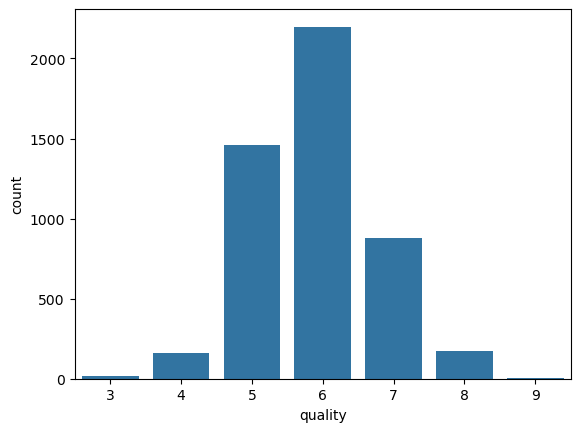

In [4]:
sns.countplot(wine, x="quality")

In [5]:
wine1 = wine.copy()

In [6]:
scaler = MinMaxScaler()
wine1['quality'] = scaler.fit_transform(wine1[['quality']])

In [7]:
print(wine1['quality'])

0       0.500000
1       0.500000
2       0.500000
3       0.500000
4       0.500000
          ...   
4893    0.500000
4894    0.333333
4895    0.500000
4896    0.666667
4897    0.500000
Name: quality, Length: 4898, dtype: float64


In [8]:
wine1[['fixed acidity' ,'volatile acidity','citric acid','free sulfur dioxide','total sulfur dioxide']].corr()

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide
fixed acidity,1.000000,-0.022697,0.289181,-0.049396,0.091070
volatile acidity,-0.022697,1.000000,-0.149472,-0.097012,0.089261
citric acid,0.289181,-0.149472,1.000000,0.094077,0.121131
free sulfur dioxide,-0.049396,-0.097012,0.094077,1.000000,0.615501
total sulfur dioxide,0.091070,0.089261,0.121131,0.615501,1.000000


In [9]:
train, test = train_test_split(wine1, train_size=0.9)

In [10]:
X_train = train[['citric acid','fixed acidity','volatile acidity']]
Y_train = train['quality']

X_test = test[['citric acid','fixed acidity','volatile acidity']]
Y_test = test['quality']

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
Y_pred = model.predict(X_test)

In [12]:
    print(mse(Y_test,Y_pred))
    print(np.sqrt(mse(Y_test,Y_pred)))

0.022247943989844598
0.1491574469808484


In [13]:
wine2 = wine.copy()

In [14]:
wine2['quality'] = pd.cut(wine2['quality'], 3, labels=["good", "medium", "bad"])

In [15]:
print(wine2['quality'])

0       medium
1       medium
2       medium
3       medium
4       medium
         ...  
4893    medium
4894      good
4895    medium
4896    medium
4897    medium
Name: quality, Length: 4898, dtype: category
Categories (3, object): ['good' < 'medium' < 'bad']


In [16]:
train2, test2 = train_test_split(wine2, train_size=0.8)

In [17]:
X_train2 = train2[['alcohol','pH','sulphates', 'residual sugar']]
Y_train2 = train2['quality']

X_test2 = test2[['alcohol','pH','sulphates', 'residual sugar']]
Y_test2 = test2['quality']

In [22]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train2, Y_train2)

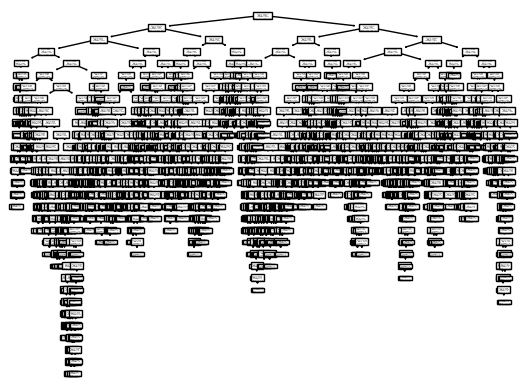

In [21]:
plt.show(tree.plot_tree(clf))

In [30]:
Y_pred2 = clf.predict(X_test2)

print(classification_report(Y_test2, Y_pred2))
print(confusion_matrix(Y_test2, Y_pred2))

              precision    recall  f1-score   support

         bad       0.27      0.42      0.33        33
        good       0.64      0.67      0.66       307
      medium       0.81      0.77      0.79       640

    accuracy                           0.73       980
   macro avg       0.58      0.62      0.59       980
weighted avg       0.74      0.73      0.73       980

[[ 14   1  18]
 [  4 207  96]
 [ 33 114 493]]
